In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
%matplotlib inline


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names
X[0:2,0:2].shape

(2L, 2L)

In [42]:
# http://blog.yhat.com/posts/sparse-random-projections.html
from sklearn.random_projection import johnson_lindenstrauss_min_dim

In [43]:
johnson_lindenstrauss_min_dim(1797,eps=0.1)
accuracies = []
components = np.int32(np.linspace(1, 30, 15))
print components

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 30]


In [44]:
digits = load_breast_cancer()
split = train_test_split(digits.data, digits.target, test_size = 0.3,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split


In [57]:
print type(digits)
print digits.data.shape
print digits.target.shape
print trainData.shape
print testData.shape
print trainTarget.shape
print testTarget.shape

<class 'sklearn.utils.Bunch'>
(569L, 30L)
(569L,)
(398L, 30L)
(171L, 30L)
(398L,)
(171L,)


In [46]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)

In [47]:
# loop over the projection sizes
for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
 
    # train a classifier on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

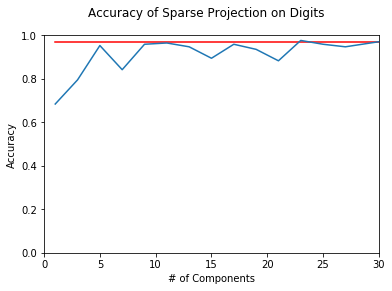

In [48]:
# create the figure
plt.figure()
plt.suptitle("Accuracy of Sparse Projection on Digits")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([0, 30])
plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()

In [49]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

###########  image segmentation  ########

In [52]:
image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')


X = image[image.columns.difference(['CLASS'])]
y = image['CLASS']
y_list = y.values.flatten()
X[0:2]

#X = scale(cancer.data)
#y = pd.DataFrame(cancer.target)
variable_names = list(image.columns.values)
print 
print variable_names

features = image[image.columns.difference(['CLASS'])]


['CLASS', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


In [53]:
print X.shape
print y.shape
print features.shape

(2310, 19)
(2310L,)
(2310, 19)


In [61]:
accuracies = []
components = np.int32(np.linspace(1, 19, 10))
print components

split = train_test_split(X, y, test_size = 0.3,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split

[ 1  3  5  7  9 11 13 15 17 19]


In [62]:
print trainData.shape
print testData.shape
print trainTarget.shape
print testTarget.shape

(1617, 19)
(693, 19)
(1617L,)
(693L,)


In [63]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)

In [64]:
# loop over the projection sizes
for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
 
    # train a classifier on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

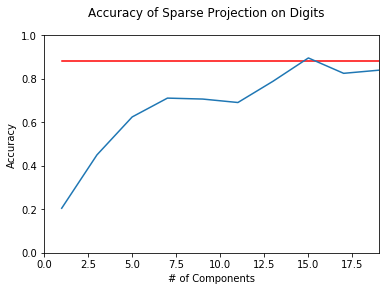

In [65]:
# create the figure
plt.figure()
plt.suptitle("Accuracy of Sparse Projection on Digits")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([0, 19])
plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()